## Part A

Medical research university X is undergoing a deep research on patients with certain conditions. University has an internal AI team. Due to confidentiality the patient’s details and the conditions are masked by the client by providing different datasets to the AI team for developing a AIML model which can predict the condition of the patient depending on the received test results

**Project Requried Basic Libray Import**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import sklearn as metrics
from textblob import TextBlob
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from os import system
%matplotlib inline

__Part1. Data Load in Pandas DataFrame__

**Part 1. 1 a - Readding all the 3 CSV files as DataFrame and 
store them into 3 separate variables.**

In [2]:
# Part1 Data load in pandas DataFrame
data_type_h= pd.read_csv("Type_H.csv")
data_type_s= pd.read_csv("Type_S.csv")
data_normal= pd.read_csv("Normal.csv")

# Par2 Data load in pandas DataFrame
#part2_data1= pd.read_csv("Data1.csv")
#part2_data2= pd.read_csv("Data2.csv")

In [3]:
data_type_h.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Type_H
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Type_H
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Type_H
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Type_H
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Type_H


**Part 1.1 b - Printing Shape of dataset and columns of all the 3 DataFrames**

In [4]:
data_type_h.shape

(60, 7)

**1 D. Print DataTypes of all the 3 DataFrames**

In [5]:
print(data_type_h.dtypes)
print()
print(data_type_s.dtypes)
print()
print(data_normal.dtypes)

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object


In [6]:
#Printing Only Column fo dataset
for column in data_type_h:
     print(f"\033[1m{column}\033[0m")

P_incidence
P_tilt
L_angle
S_slope
P_radius
S_Degree
Class


In [7]:
data_type_s.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,Type_S
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,Type_S
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,Type_S
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,Type_S
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,Type_S


In [8]:
data_type_s.shape

(150, 7)

In [9]:
data_type_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  150 non-null    float64
 1   P_tilt       150 non-null    float64
 2   L_angle      150 non-null    float64
 3   S_slope      150 non-null    float64
 4   P_radius     150 non-null    float64
 5   S_Degree     150 non-null    float64
 6   Class        150 non-null    object 
dtypes: float64(6), object(1)
memory usage: 8.3+ KB


In [10]:
#Printing Only Column fo dataset
for column in data_type_s:
    print(f"\033[1m{column}\033[0m")

P_incidence
P_tilt
L_angle
S_slope
P_radius
S_Degree
Class


In [11]:
data_normal.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [12]:
data_normal.shape

(100, 7)

In [13]:
data_normal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  100 non-null    float64
 1   P_tilt       100 non-null    float64
 2   L_angle      100 non-null    float64
 3   S_slope      100 non-null    float64
 4   P_radius     100 non-null    float64
 5   S_Degree     100 non-null    float64
 6   Class        100 non-null    object 
dtypes: float64(6), object(1)
memory usage: 5.6+ KB


In [14]:
#Printing Only Column fo dataset
for column in data_normal:
     print(f"\033[1m{column}\033[0m")

P_incidence
P_tilt
L_angle
S_slope
P_radius
S_Degree
Class


**Here the Observation of Three dataset veriable DataFrames are same Columns Names and same amount of column no**     

In [15]:
set(data_type_s.columns).intersection(set(data_type_h.columns)).intersection(set(data_normal.columns))

{'Class',
 'L_angle',
 'P_incidence',
 'P_radius',
 'P_tilt',
 'S_Degree',
 'S_slope'}

Instersection All three DataFrame Column =  $A \cap B \cap C$

**Changing 'Class' Column Object Datatype to Categorial Veriable**

In [16]:
#First  Data Set Object veriable type to Categoraical datatype 'Class'
for col in data_type_s.columns:
    if data_type_s[col].dtype =='object':
        data_type_s[col] = pd.Categorical(data_type_s[col])
        
        
#Second  Data Set Object veriable type to Categoraical datatype 'Class'
for col in data_type_h.columns:
    if data_type_h[col].dtype =='object':
        data_type_h[col] = pd.Categorical(data_type_h[col])

        
#Third  Data Set Object veriable type to Categoraical datatype 'Class'
for col in data_normal.columns:
    if data_normal[col].dtype =='object':
        data_normal[col] = pd.Categorical(data_normal[col])     

**1 E. Observe and share variation in ‘Class’ feature of all the 3 DaraFrames**

In [17]:
data_type_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   P_incidence  150 non-null    float64 
 1   P_tilt       150 non-null    float64 
 2   L_angle      150 non-null    float64 
 3   S_slope      150 non-null    float64 
 4   P_radius     150 non-null    float64 
 5   S_Degree     150 non-null    float64 
 6   Class        150 non-null    category
dtypes: category(1), float64(6)
memory usage: 7.4 KB


In [18]:
data_type_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   P_incidence  60 non-null     float64 
 1   P_tilt       60 non-null     float64 
 2   L_angle      60 non-null     float64 
 3   S_slope      60 non-null     float64 
 4   P_radius     60 non-null     float64 
 5   S_Degree     60 non-null     float64 
 6   Class        60 non-null     category
dtypes: category(1), float64(6)
memory usage: 3.1 KB


In [19]:
data_normal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   P_incidence  100 non-null    float64 
 1   P_tilt       100 non-null    float64 
 2   L_angle      100 non-null    float64 
 3   S_slope      100 non-null    float64 
 4   P_radius     100 non-null    float64 
 5   S_Degree     100 non-null    float64 
 6   Class        100 non-null    category
dtypes: category(1), float64(6)
memory usage: 5.0 KB


**showing All the Categorical Datatype Values Observation of Three Dataset of DataFrame**

In [20]:
print(data_type_h.Class.value_counts())
print(data_type_s.Class.value_counts())
print(data_normal.Class.value_counts())

Type_H    37
type_h    23
Name: Class, dtype: int64
Type_S    133
tp_s       17
Name: Class, dtype: int64
Normal    73
Nrmal     27
Name: Class, dtype: int64


**Part 1.2 a - Unify all the variations in ‘Class’ feature for all the 3 DataFrames**

In [21]:
# Same type of rows content Unifying 
data_type_h.Class = data_type_h.Class.apply(lambda text: 'Type_H'.lower() if text=='type_h' else text.lower())
data_type_s.Class = data_type_s.Class.apply(lambda text: 'Type_S'.lower() if text=='tp_s' else text.lower())
data_normal.Class = data_normal.Class.apply(lambda text: 'Normal'.lower() if text=='Nrmal' else text.lower())

#After Change and fromate the Unify specling Error Data
print(data_type_h.Class.value_counts())
print(data_type_s.Class.value_counts())
print(data_normal.Class.value_counts())

type_h    60
Name: Class, dtype: int64
type_s    150
Name: Class, dtype: int64
normal    100
Name: Class, dtype: int64


**2 B. Combine all the 3 DataFrames to form a single DataFrame**

In [22]:
single_data=pd.DataFrame(pd.concat([data_type_h, data_type_s,data_normal], ignore_index=True))

In [23]:
single_data.shape

(310, 7)

In [24]:
single_data.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,type_h
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,type_h
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,type_h
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,type_h
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,type_h


In [25]:
single_data.describe().T

,count,mean,std,min,25%,50%,75%,max
P_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
P_tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
L_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
S_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
P_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
S_Degree,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


In [26]:
#First  Data Set Object veriable type to Categoraical datatype 'Class'
for col in single_data.columns:
    if single_data[col].dtype =='object':
        single_data[col] = pd.Categorical(single_data[col])

In [27]:
single_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   P_incidence  310 non-null    float64 
 1   P_tilt       310 non-null    float64 
 2   L_angle      310 non-null    float64 
 3   S_slope      310 non-null    float64 
 4   P_radius     310 non-null    float64 
 5   S_Degree     310 non-null    float64 
 6   Class        310 non-null    category
dtypes: category(1), float64(6)
memory usage: 15.1 KB


In [28]:
print(single_data.Class.value_counts())
print(single_data.Class.value_counts())
print(single_data.Class.value_counts())

type_s    150
normal    100
type_h     60
Name: Class, dtype: int64
type_s    150
normal    100
type_h     60
Name: Class, dtype: int64
type_s    150
normal    100
type_h     60
Name: Class, dtype: int64


**C. Print 5 random samples of this DataFrame**

In [29]:
sample_data = single_data.sample(n=5, random_state=5);

In [30]:
sample_data

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
275,67.289712,16.717514,51.000000,50.572198,137.591778,4.960344,normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,normal
48,40.557357,17.977784,34.000000,22.579573,121.046246,-1.537383,type_h
282,53.683380,13.447022,41.584297,40.236358,113.913703,2.737035,normal


__D. Print Feature-wise percentage of Null values.__

In [31]:
nullValue=(sample_data.isnull().sum() * 100)/len(sample_data)
nullValue_single_data= (single_data.isnull().sum() * 100)/len(single_data)

In [32]:
print(f"{nullValue}")
print(f"{nullValue_single_data}")

P_incidence    0.0
P_tilt         0.0
L_angle        0.0
S_slope        0.0
P_radius       0.0
S_Degree       0.0
Class          0.0
dtype: float64
P_incidence    0.0
P_tilt         0.0
L_angle        0.0
S_slope        0.0
P_radius       0.0
S_Degree       0.0
Class          0.0
dtype: float64


**E.Summary of 5 sample data & population data**

In [33]:
sample_data.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,48.124976,12.381894,40.961731,35.743083,123.008562,1.235099
std,12.920090,5.437332,6.493708,10.755157,8.944699,2.594147
min,33.841641,5.073991,34.000000,22.579573,113.913703,-1.537383
25%,40.557357,8.693157,36.641233,28.767649,118.545842,-0.199249
50%,45.252792,13.447022,41.583126,36.559635,121.046246,0.214750
75%,53.683380,16.717514,41.584297,40.236358,123.945244,2.737035
max,67.289712,17.977784,51.000000,50.572198,137.591778,4.960344


In [34]:
single_data.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


**A. Visualize a heatmap to understand correlation between all features**

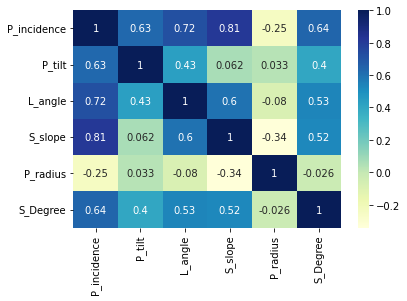

In [35]:
# plotting correlation heatmap
dataplot = sns.heatmap(single_data.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [36]:
correlations = single_data.corr()
print(correlations)

             P_incidence    P_tilt   L_angle   S_slope  P_radius  S_Degree
P_incidence     1.000000  0.629199  0.717282  0.814960 -0.247467  0.638743
P_tilt          0.629199  1.000000  0.432764  0.062345  0.032668  0.397862
L_angle         0.717282  0.432764  1.000000  0.598387 -0.080344  0.533667
S_slope         0.814960  0.062345  0.598387  1.000000 -0.342128  0.523557
P_radius       -0.247467  0.032668 -0.080344 -0.342128  1.000000 -0.026065
S_Degree        0.638743  0.397862  0.533667  0.523557 -0.026065  1.000000


**C. Visualize a pairplot with 3 classes distinguished by colors and share insights**

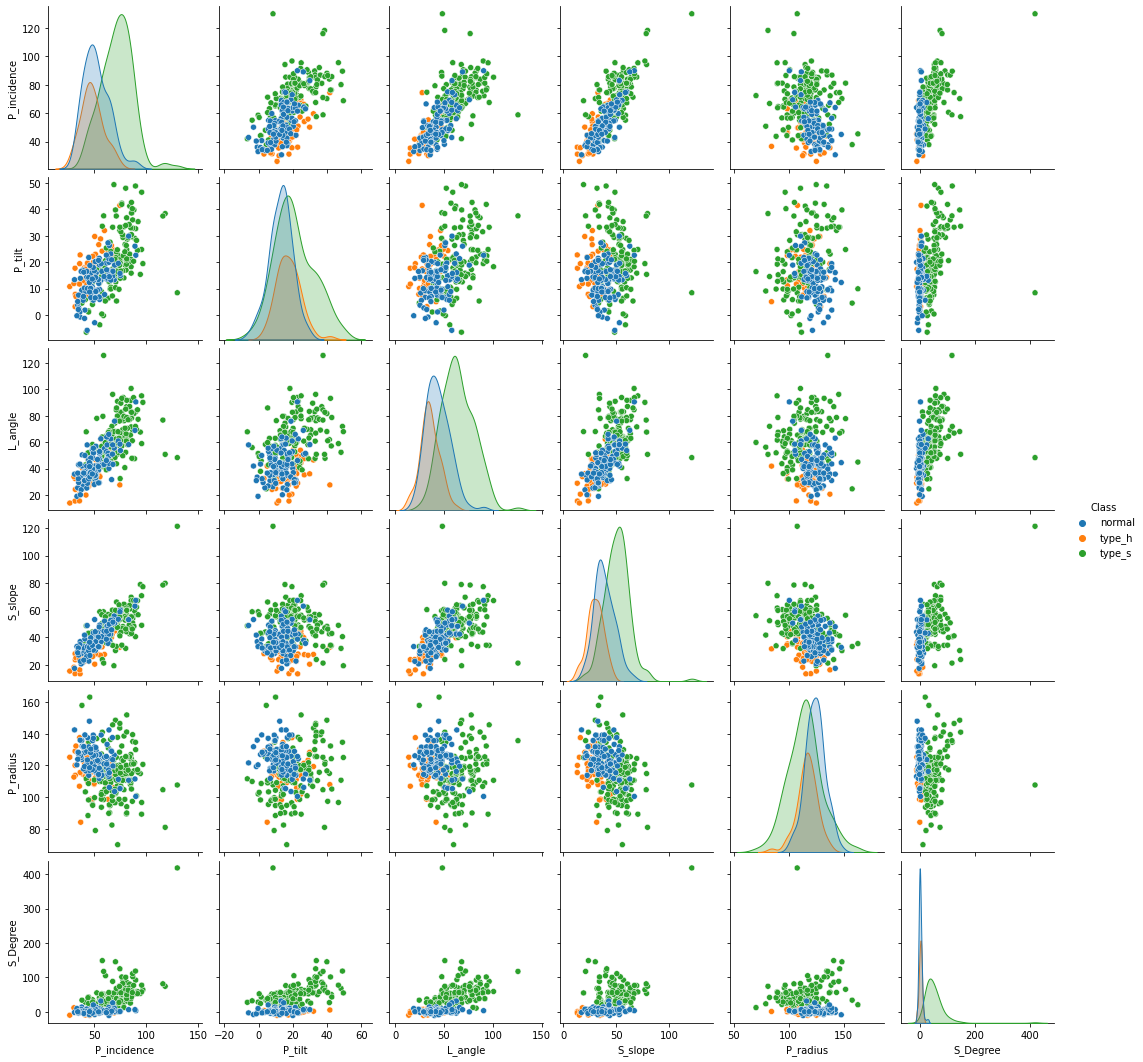

In [37]:
sns.pairplot(single_data,  hue ='Class')
plt.show()

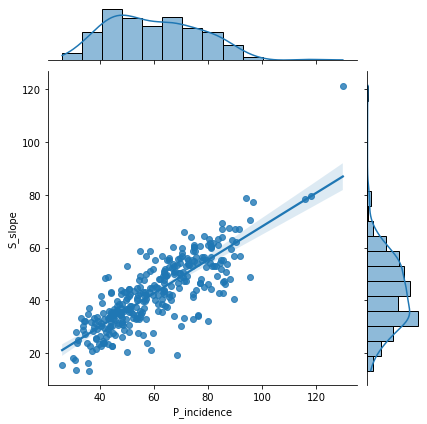

In [38]:
#1.3 d - Visualize a jointplot for ‘P_incidence’ and ‘S_slope’ and share insights
sns.jointplot(x = "P_incidence", y = "S_slope", kind = "reg", data = single_data)
plt.show()  

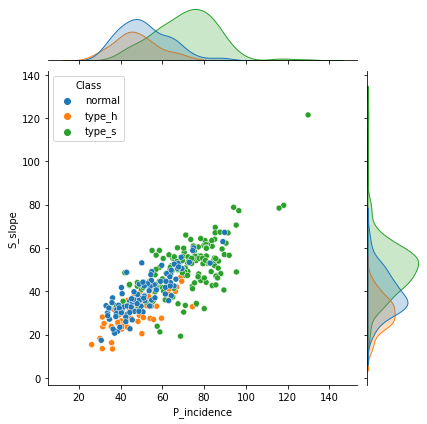

In [39]:
sns.jointplot(x = "P_incidence", y = "S_slope", data = single_data,  hue="Class")
plt.show()  

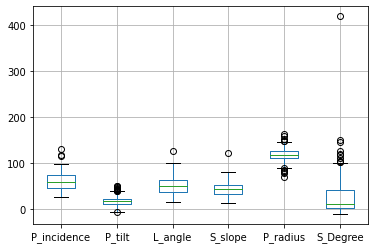

In [40]:
#E. Visualize a boxplot to check distribution of the features and share insights
single_data.boxplot(column=['P_incidence', 'P_tilt', 'L_angle','S_slope', 'P_radius','S_Degree']);
plt.show()

## Split data into X and Y

In [41]:
X = single_data.drop('Class',axis=1)
Y = single_data['Class']

# Split X and y into training and test set in 80:20 ratio
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=1)
x_train.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
271,42.515610,16.541216,42.000000,25.974394,120.631941,7.876731
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018
249,50.753290,20.235060,37.000000,30.518231,122.343516,2.288488
233,40.683229,9.148437,31.021593,31.534792,139.118472,-2.511619
28,44.551012,21.931147,26.785916,22.619865,111.072920,2.652321


In [42]:
XScaled  = X.apply(zscore)  # convert all attributes to Z scale 
XScaled.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02
mean,-9.168293e-17,1.833659e-16,1.375244e-16,-1.031433e-16,4.354939e-16,1.833659e-16
std,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00
min,-1.996010e+00,-2.411664e+00,-2.047652e+00,-2.207741e+00,-3.597963e+00,-9.961725e-01
25%,-8.173982e-01,-6.881138e-01,-8.060267e-01,-7.168418e-01,-5.423830e-01,-6.585073e-01
50%,-1.049246e-01,-1.186061e-01,-1.278621e-01,-4.095971e-02,2.613767e-02,-3.874502e-01
75%,7.194643e-01,4.581158e-01,5.975493e-01,7.269414e-01,5.676209e-01,3.997679e-01
max,4.029206e+00,3.191402e+00,3.984615e+00,5.855771e+00,3.395818e+00,1.046035e+01


## Spliting zcore Data 

In [43]:
# Split X and y into training and test set in 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(XScaled, Y, test_size=0.4, random_state=1)

## Creating kNN Model

In [44]:
NNH = KNeighborsClassifier(n_neighbors= 5, weights = 'distance')

In [45]:
# Call Nearest Neighbour algorithm
NNH.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

## Evaluate Performance of kNN Model

In [46]:
predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.75

Confusion Matrix


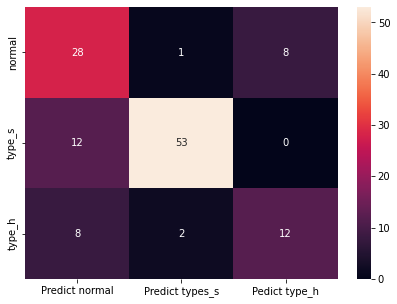

In [47]:
from sklearn import metrics
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, predicted_labels, labels=["normal", "type_s","type_h"])
df_cm = pd.DataFrame(cm, index = [i for i in ["normal","type_s","type_h"]], columns = [i for i in ["Predict normal","Predict types_s","Pedict type_h"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
plt.show()

In [48]:
dt_score =[]
for k in range(1,50):
    NNH = KNeighborsClassifier(n_neighbors = k, weights = 'distance' )
    NNH.fit(X_train, y_train)
    dt_score.append(NNH.score(X_test, y_test))

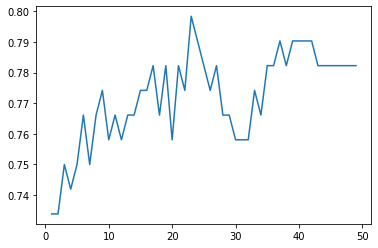

In [49]:
plt.plot(range(1,50),dt_score)
plt.show()

## 5. Performance Improvement

In [50]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [51]:
clf = svm.SVC(gamma=0.025, C=3) 
clf.fit(X_train , y_train)

SVC(C=3, gamma=0.025)

In [52]:
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred)*100)

83.06451612903226


## Part B

**DOMAIN:** banking,Marketing

**CONTEXT:**  
A bank X is on a massive digital transformation for all its departments. Bank has a growing customer base whee majority of them are 
liability customers (depositors) vs borrowers (asset customers). The bank is interested in expanding the borrowers base rapidly to bring in more 
business via loan interests. A campaign that the bank ran in last quarter showed an average single digit conversion rate. Digital transformation 
being the core strength of the business strategy, marketing department wants to devise effective campaigns with better target marketing to 
increase the conversion ratio to double digit with same budget as per last campaign


In [53]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.neighbors import NearestNeighbors
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [54]:
#Read data from csv file
data1= pd.read_csv("data1.csv")
data2= pd.read_csv("data2.csv")

In [55]:
print(data1.shape)
data1

(5000, 8)


,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2
...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3
4996,4997,30,4,15,92037,4,0.4,1
4997,4998,63,39,24,93023,2,0.3,3
4998,4999,65,40,49,90034,3,0.5,2


In [56]:
print(data2.shape)
data2

(5000, 7)


,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN
...,...,...,...,...,...,...,...
4995,4996,0,0,0,1,0,0.0
4996,4997,85,0,0,1,0,0.0
4997,4998,0,0,0,0,0,0.0
4998,4999,0,0,0,1,0,0.0


**Part 2.1 b - Print shape and Column Names and DataTypes of both the Dataframes**

In [57]:
print(data1.dtypes)
print()
print(data2.dtypes)

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
dtype: object

ID                       int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object


In [58]:
#Part 2.1 c - Merge both the Dataframes on ‘ID’ feature to form a single DataFrame
single_data2 = pd.merge(data1, data2, on="ID")

In [59]:
single_data2

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0,0.0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0,0.0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0.0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0,0.0


In [60]:
print(single_data2.dtypes)

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object


In [61]:
single_data2=single_data2.fillna(0)
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(single_data2)
print(imp_mean.transform(single_data2))

[[1.000e+00 2.500e+01 1.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [2.000e+00 4.500e+01 1.900e+01 ... 0.000e+00 0.000e+00 0.000e+00]
 [3.000e+00 3.900e+01 1.500e+01 ... 0.000e+00 0.000e+00 0.000e+00]
 ...
 [4.998e+03 6.300e+01 3.900e+01 ... 0.000e+00 0.000e+00 0.000e+00]
 [4.999e+03 6.500e+01 4.000e+01 ... 1.000e+00 0.000e+00 0.000e+00]
 [5.000e+03 2.800e+01 4.000e+00 ... 1.000e+00 1.000e+00 0.000e+00]]


In [62]:
single_data2.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
CustomerSince,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
HighestSpend,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZipCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
HiddenScore,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
MonthlyAverageSpend,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Level,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Security,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


**1.D. Change Datatype of below features to ‘Object’**

In [63]:
# using dictionary to convert specific columns
convert_dict = {'CreditCard': object,
                'InternetBanking': object,
                'FixedDepositAccount':object,
                 'Security':object,
                 'Level':object,
                 'HiddenScore':object,
                }
after_change_dtype_data= single_data2.astype(convert_dict)
print(after_change_dtype_data.dtypes)

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore             object
MonthlyAverageSpend    float64
Level                   object
Mortgage                 int64
Security                object
FixedDepositAccount     object
InternetBanking         object
CreditCard              object
LoanOnCard             float64
dtype: object


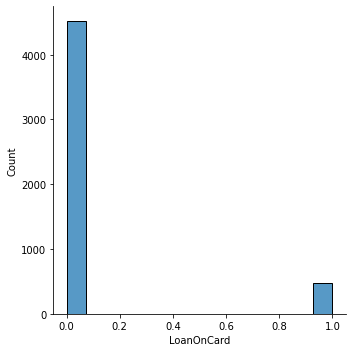

In [64]:
sns.displot(after_change_dtype_data, x="LoanOnCard")
plt.show()

In [65]:
#cheking mission null value percentage 
percent_missing = after_change_dtype_data.isnull().sum() * 100 / len(after_change_dtype_data)
print(percent_missing)

ID                     0.0
Age                    0.0
CustomerSince          0.0
HighestSpend           0.0
ZipCode                0.0
HiddenScore            0.0
MonthlyAverageSpend    0.0
Level                  0.0
Mortgage               0.0
Security               0.0
FixedDepositAccount    0.0
InternetBanking        0.0
CreditCard             0.0
LoanOnCard             0.0
dtype: float64


In [66]:
drop_dt=single_data2.drop(columns=['ID','ZipCode','LoanOnCard'])
X=drop_dt.drop(columns=['Security','FixedDepositAccount','InternetBanking','CreditCard'])
# this all are Categorical verialbe yes or no (1 and 0) 
y= single_data2['CreditCard']

y1 = single_data2['InternetBanking']
y2 = single_data2['FixedDepositAccount']
y3 = single_data2['Security']

In [67]:
#Normalizing and Scaling Data zscore data
XScaled  = X.apply(zscore) 
XScaled

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage
0,-1.774417,-1.666078,-0.538229,1.397414,-0.193385,-1.049078,-0.555524
1,-0.029524,-0.096330,-0.864109,0.525991,-0.250611,-1.049078,-0.555524
2,-0.552992,-0.445163,-1.363793,-1.216855,-0.536736,-1.049078,-0.555524
3,-0.901970,-0.968413,0.569765,-1.216855,0.436091,0.141703,-0.555524
4,-0.901970,-1.055621,-0.625130,1.397414,-0.536736,0.141703,-0.555524
...,...,...,...,...,...,...,...
4995,-1.425438,-1.491662,-0.733757,-1.216855,-0.021710,1.332484,-0.555524
4996,-1.338194,-1.404454,-1.276892,1.397414,-0.880087,-1.049078,0.280238
4997,1.540880,1.647835,-1.081363,-0.345432,-0.937312,1.332484,-0.555524
4998,1.715370,1.735043,-0.538229,0.525991,-0.822862,0.141703,-0.555524


In [68]:
# Split X and y into training and test set in 25% ratio dat
X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size=0.25, random_state=1)

#Smilary x and y spliging base on InternetBanking, FixedDepositAccount, Security
X1_train, X1_test, y1_train, y1_test = train_test_split(XScaled, y1, test_size=0.25, random_state=1)
X2_train, X2_test, y2_train, y2_test = train_test_split(XScaled, y2, test_size=0.25, random_state=1)
X3_train, X3_test, y3_train, y3_test = train_test_split(XScaled, y3, test_size=0.25, random_state=1)

In [69]:
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()
logisticRegr1 = LogisticRegression()
logisticRegr2 = LogisticRegression()
logisticRegr3 = LogisticRegression()

**Supervised Learning Classification base model - Logistic Regression**

In [70]:
logisticRegr.fit(X_train, y_train)
logisticRegr1.fit(X1_train, y1_train)
logisticRegr2.fit(X1_train, y1_train)
logisticRegr3.fit(X1_train, y1_train)

LogisticRegression()

In [71]:
predictions = logisticRegr.predict(X_test)
predictions1 = logisticRegr.predict(X1_test)
predictions2 = logisticRegr.predict(X2_test)
predictions3 = logisticRegr.predict(X3_test)

In [72]:
creditCard_score = logisticRegr.score(X_test, y_test)
InternetBanking_score = logisticRegr.score(X1_test, y1_test)
FixedDepositAccount_score = logisticRegr.score(X2_test, y2_test)
Security_score = logisticRegr.score(X3_test, y3_test)

print(f"The Customer Have Credit Card = {creditCard_score*100}%")
print(f"Customer use Internet Banking = {InternetBanking_score*100}%")
print(f"Customer Have Fixed Deposit Account in Bank = {FixedDepositAccount_score*100}%")
print(f"The Customer Have Bank Security = {Security_score*100}%")

The Customer Have Credit Card = 71.6%
Customer use Internet Banking = 39.519999999999996%
Customer Have Fixed Deposit Account in Bank = 94.08%
The Customer Have Bank Security = 88.8%


In [73]:
#Confusing Matrix of CreditScore 
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[895   0]
 [355   0]]


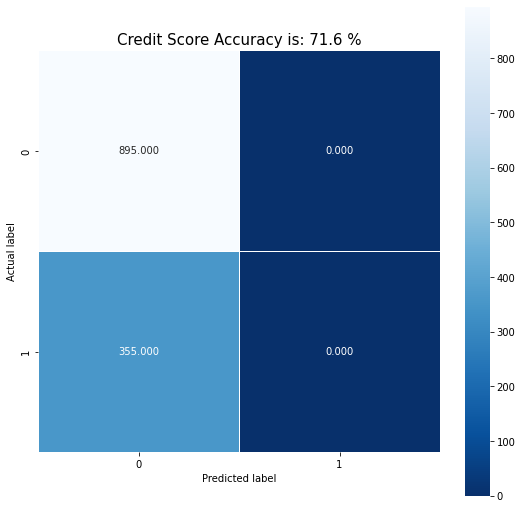

In [74]:
#Confusion Matrix of Credit Score
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Credit Score Accuracy is: {0} %'.format(creditCard_score*100)
plt.title(all_sample_title, size = 15);


## Gaussian Kernel

In [75]:
svclassifier1 = SVC(kernel='rbf')
svclassifier1.fit(X1_train, y1_train)

SVC()

## Prediction and Evaluation

In [76]:
y1_predict = svclassifier1.predict(X1_test)
#Confusiton Matrix
internet_backing_cm = confusion_matrix(y1_test, y1_predict)
print(confusion_matrix(y1_test, y1_predict))

[[  1 493]
 [  2 754]]


In [77]:
# Model Accuracy: how often is the classifier correct?
ib_score = metrics.accuracy_score(y1_test, y1_predict)
print(f"Cusotmer Internet Backing = {ib_score}")

Cusotmer Internet Backing = 0.604


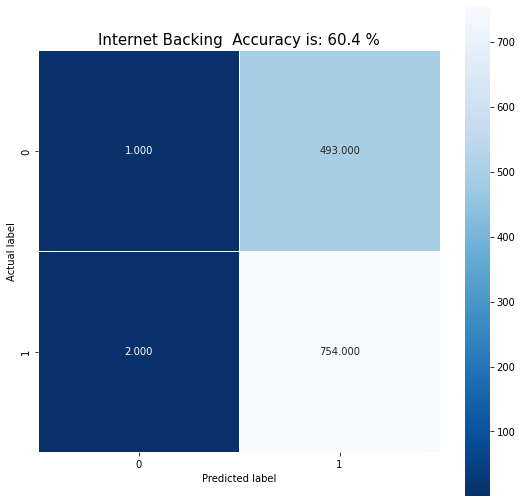

In [78]:
plt.figure(figsize=(9,9))
sns.heatmap(internet_backing_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title_internet_banking = 'Internet Backing  Accuracy is: {0} %'.format(ib_score*100)
plt.title(title_internet_banking, size = 15);

In [79]:
#SVM Classification Repoerts
print(classification_report(y1_test, y1_predict))

              precision    recall  f1-score   support

           0       0.33      0.00      0.00       494
           1       0.60      1.00      0.75       756

    accuracy                           0.60      1250
   macro avg       0.47      0.50      0.38      1250
weighted avg       0.50      0.60      0.46      1250



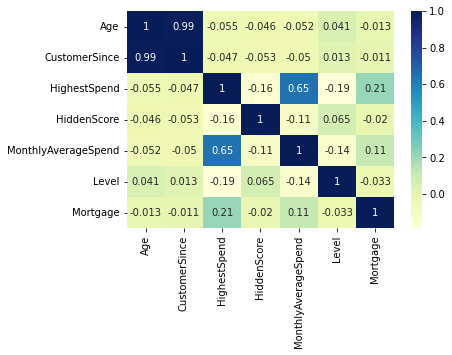

In [80]:
dataplot = sns.heatmap(X.corr(), cmap="YlGnBu", annot=True)
plt.show()

## KNN Classification Model

In [81]:
#K-NN
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train, y_train)
y_pred = KNN_model.predict(X_test)
precision = metrics.accuracy_score(y_pred, y_test) * 100
print("Customer Bank Credit Card Accuracy : {0:.2f}%".format(precision))

Customer Bank Credit Card Accuracy : 64.88%


In [82]:
#K-NN
KNN_model1 = KNeighborsClassifier(n_neighbors=5)
KNN_model1.fit(X1_train, y1_train)
y1_pred = KNN_model.predict(X1_test)
precision1 = metrics.accuracy_score(y1_pred, y1_test) * 100
print("Customer Use Internet Backing Accuracy : {0:.2f}%".format(precision1))

Customer Use Internet Backing Accuracy : 42.40%
